In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [2]:
#df = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/healthcare_dataset.csv')

In [3]:
df = pd.read_csv('C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\healthcare_dataset.csv')

In [4]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [5]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df.describe(include=object)

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
df['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [9]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

In [10]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df = df.set_index('Date of Admission')
ts_df = df.resample('D').size().rename('Total Admissions')

In [11]:
ts_add_type = df.groupby(['Admission Type']).resample('D').size().unstack('Admission Type').fillna(0)
ts_add_type

Admission Type,Elective,Emergency,Urgent
Date of Admission,,,
2019-05-08,11,14,2
2019-05-09,14,9,15
2019-05-10,7,1,9
2019-05-11,11,5,9
2019-05-12,14,10,12
...,...,...,...
2024-05-03,8,16,7
2024-05-04,9,6,9
2024-05-05,6,8,12


In [12]:
ts_insurance = df.groupby(['Insurance Provider']).resample('D').size().unstack('Insurance Provider').fillna(0)
ts_insurance

Insurance Provider,Aetna,Blue Cross,Cigna,Medicare,UnitedHealthcare
Date of Admission,,,,,
2019-05-08,4,6,9,3,5
2019-05-09,4,10,6,9,9
2019-05-10,2,3,3,4,5
2019-05-11,6,3,3,5,8
2019-05-12,10,8,7,5,6
...,...,...,...,...,...
2024-05-03,9,5,4,8,5
2024-05-04,2,1,7,11,3
2024-05-05,4,4,10,4,4


In [13]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [14]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [15]:
add_df = df.groupby(['Date of Admission', 'Admission Type', 'Gender']).size().reset_index(name='Admissions')
ts_add_type = add_df.pivot_table(
    index=['Date of Admission', 'Admission Type'],
    columns='Gender',
    values='Admissions',
    fill_value=0
).reset_index()
ts_add_type['Admissions'] = ts_add_type['Female'] + ts_add_type['Male']
ts_add_type

Gender,Date of Admission,Admission Type,Female,Male,Admissions
0,2019-05-08,Elective,6.0,5.0,11.0
1,2019-05-08,Emergency,6.0,8.0,14.0
2,2019-05-08,Urgent,0.0,2.0,2.0
3,2019-05-09,Elective,6.0,8.0,14.0
4,2019-05-09,Emergency,3.0,6.0,9.0
...,...,...,...,...,...
5475,2024-05-06,Emergency,3.0,5.0,8.0
5476,2024-05-06,Urgent,4.0,8.0,12.0
5477,2024-05-07,Elective,10.0,4.0,14.0
5478,2024-05-07,Emergency,2.0,7.0,9.0


In [16]:
# Group by Date of Admission, Insurance Provider, and Gender to count admissions by Gender
ins_df = df.groupby(['Date of Admission', 'Insurance Provider', 'Gender']).size().reset_index(name='Admissions')

# Pivot to create new columns for each unique Gender within each Insurance Provider
ts_insurance = ins_df.pivot_table(
    index=['Date of Admission', 'Insurance Provider'],
    columns='Gender',
    values='Admissions',
    fill_value=0
).reset_index()
ts_insurance['Admissions'] = ts_insurance['Female'] + ts_insurance['Male']
ts_insurance

Gender,Date of Admission,Insurance Provider,Female,Male,Admissions
0,2019-05-08,Aetna,1.0,3.0,4.0
1,2019-05-08,Blue Cross,5.0,1.0,6.0
2,2019-05-08,Cigna,5.0,4.0,9.0
3,2019-05-08,Medicare,0.0,3.0,3.0
4,2019-05-08,UnitedHealthcare,1.0,4.0,5.0
...,...,...,...,...,...
9094,2024-05-07,Aetna,2.0,2.0,4.0
9095,2024-05-07,Blue Cross,4.0,2.0,6.0
9096,2024-05-07,Cigna,5.0,2.0,7.0
9097,2024-05-07,Medicare,4.0,7.0,11.0


## Time Series Addmission Type

In [17]:
ts_add_elective = ts_add_type[ts_add_type['Admission Type'] == 'Elective']
ts_add_elective.drop(columns=['Admission Type'], inplace=True)
ts_add_elective.set_index('Date of Admission', inplace=True)
ts_add_elective

Gender,Female,Male,Admissions
Date of Admission,,,
2019-05-08,6.0,5.0,11.0
2019-05-09,6.0,8.0,14.0
2019-05-10,4.0,3.0,7.0
2019-05-11,5.0,6.0,11.0
2019-05-12,8.0,6.0,14.0
...,...,...,...
2024-05-03,3.0,5.0,8.0
2024-05-04,6.0,3.0,9.0
2024-05-05,2.0,4.0,6.0


In [18]:
ts_add_emergency = ts_add_type[ts_add_type['Admission Type'] == 'Emergency']
ts_add_emergency.drop(columns=['Admission Type'], inplace=True)
ts_add_emergency.set_index('Date of Admission', inplace=True)
ts_add_emergency

Gender,Female,Male,Admissions
Date of Admission,,,
2019-05-08,6.0,8.0,14.0
2019-05-09,3.0,6.0,9.0
2019-05-10,1.0,0.0,1.0
2019-05-11,3.0,2.0,5.0
2019-05-12,7.0,3.0,10.0
...,...,...,...
2024-05-03,7.0,9.0,16.0
2024-05-04,3.0,3.0,6.0
2024-05-05,4.0,4.0,8.0


In [19]:
ts_add_urgent = ts_add_type[ts_add_type['Admission Type'] == 'Urgent']
ts_add_urgent.drop(columns=['Admission Type'], inplace=True)
ts_add_urgent.set_index('Date of Admission', inplace=True)
ts_add_urgent

Gender,Female,Male,Admissions
Date of Admission,,,
2019-05-08,0.0,2.0,2.0
2019-05-09,5.0,10.0,15.0
2019-05-10,4.0,5.0,9.0
2019-05-11,6.0,3.0,9.0
2019-05-12,7.0,5.0,12.0
...,...,...,...
2024-05-03,4.0,3.0,7.0
2024-05-04,3.0,6.0,9.0
2024-05-05,5.0,7.0,12.0


### Elective Type

In [20]:
ts_add_elective.describe()

Gender,Female,Male,Admissions
count,1827.000000,1827.000000,1827.000000
mean,5.130816,5.079912,10.210728
std,2.474153,2.458008,3.479392
min,0.000000,0.000000,1.000000
25%,3.000000,3.000000,8.000000
50%,5.000000,5.000000,10.000000
75%,7.000000,7.000000,12.000000
max,15.000000,15.000000,23.000000


In [21]:
ts_add_elective =ts_add_elective.resample('W').sum()
ts_add_elective

Gender,Female,Male,Admissions
Date of Admission,,,
2019-05-12,29.0,28.0,57.0
2019-05-19,33.0,31.0,64.0
2019-05-26,40.0,36.0,76.0
2019-06-02,29.0,38.0,67.0
2019-06-09,32.0,41.0,73.0
...,...,...,...
2024-04-14,29.0,35.0,64.0
2024-04-21,39.0,36.0,75.0
2024-04-28,50.0,35.0,85.0


<Axes: xlabel='Date of Admission'>

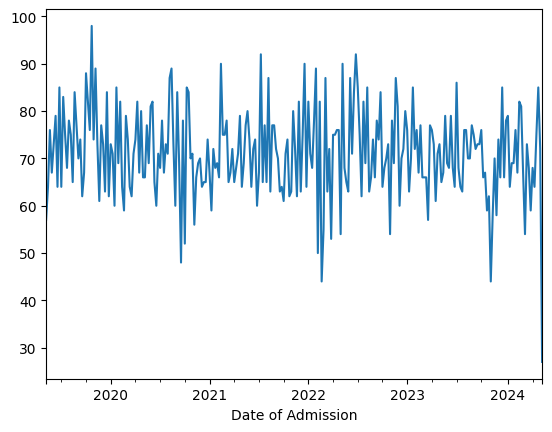

In [22]:
ts_add_elective['Admissions'].plot()

In [23]:
# Creating lagged features for previous days (e.g., lags of 1, 7, and 30 days)
for lag in [1, 7, 30]:
    ts_add_elective[f'lag_{lag}'] = ts_add_elective['Admissions'].shift(lag)

In [47]:
# Ensure the index is in datetime format
ts_add_elective.index = pd.to_datetime(ts_add_elective.index)

# Add day, month, and year features
ts_add_elective['day'] = ts_add_elective.index.day
ts_add_elective['month'] = ts_add_elective.index.month
ts_add_elective['year'] = ts_add_elective.index.year

In [24]:
ts_add_elective

Gender,Female,Male,Admissions,lag_1,lag_7,lag_30
Date of Admission,,,,,,
2019-05-12,29.0,28.0,57.0,NaN,NaN,NaN
2019-05-19,33.0,31.0,64.0,57.0,NaN,NaN
2019-05-26,40.0,36.0,76.0,64.0,NaN,NaN
2019-06-02,29.0,38.0,67.0,76.0,NaN,NaN
2019-06-09,32.0,41.0,73.0,67.0,NaN,NaN
...,...,...,...,...,...,...
2024-04-14,29.0,35.0,64.0,68.0,81.0,73.0
2024-04-21,39.0,36.0,75.0,64.0,67.0,73.0
2024-04-28,50.0,35.0,85.0,75.0,54.0,76.0


In [25]:
ts_add_elective

Gender,Female,Male,Admissions,lag_1,lag_7,lag_30
Date of Admission,,,,,,
2019-05-12,29.0,28.0,57.0,NaN,NaN,NaN
2019-05-19,33.0,31.0,64.0,57.0,NaN,NaN
2019-05-26,40.0,36.0,76.0,64.0,NaN,NaN
2019-06-02,29.0,38.0,67.0,76.0,NaN,NaN
2019-06-09,32.0,41.0,73.0,67.0,NaN,NaN
...,...,...,...,...,...,...
2024-04-14,29.0,35.0,64.0,68.0,81.0,73.0
2024-04-21,39.0,36.0,75.0,64.0,67.0,73.0
2024-04-28,50.0,35.0,85.0,75.0,54.0,76.0


In [26]:
# Add rolling mean (e.g., 7-day window)
ts_add_elective['rolling_mean_7'] = ts_add_elective['Admissions'].rolling(window=7).mean()

In [27]:
ts_add_elective.dropna(inplace=True)

In [28]:
ts_add_elective

Gender,Female,Male,Admissions,lag_1,lag_7,lag_30,rolling_mean_7
Date of Admission,,,,,,,
2019-12-08,41.0,32.0,73.0,77.0,76.0,57.0,77.857143
2019-12-15,32.0,31.0,63.0,73.0,98.0,64.0,72.857143
2019-12-22,32.0,52.0,84.0,63.0,74.0,76.0,74.285714
2019-12-29,33.0,29.0,62.0,84.0,89.0,67.0,70.428571
2020-01-05,40.0,33.0,73.0,62.0,73.0,73.0,70.428571
...,...,...,...,...,...,...,...
2024-04-14,29.0,35.0,64.0,68.0,81.0,73.0,64.714286
2024-04-21,39.0,36.0,75.0,64.0,67.0,73.0,65.857143
2024-04-28,50.0,35.0,85.0,75.0,54.0,76.0,70.285714


In [29]:
ts_add_elective.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2019-12-08 to 2024-05-12
Freq: W-SUN
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Female          232 non-null    float64
 1   Male            232 non-null    float64
 2   Admissions      232 non-null    float64
 3   lag_1           232 non-null    float64
 4   lag_7           232 non-null    float64
 5   lag_30          232 non-null    float64
 6   rolling_mean_7  232 non-null    float64
dtypes: float64(7)
memory usage: 14.5 KB


In [30]:
x = ts_add_elective.drop(columns=['Admissions'])
y = ts_add_elective['Admissions']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

#### Random Forest Elective

In [32]:
rf = RandomForestRegressor(random_state=42)

In [33]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error')

In [34]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [35]:
best_rf = grid_search_rf.best_estimator_

In [36]:
rf_scores = evaluate_model(best_rf, x_test, y_test)
print("Random Forest Evaluation Scores:", rf_scores)

Random Forest Evaluation Scores: {'MAE': 1.5161702127659573, 'MSE': 13.343285106382977, 'RMSE': 3.6528461651680564, 'R2': 0.8746392677906126}


#### XGBoost Elective

In [37]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

In [38]:
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error')

In [39]:
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [40]:
best_xgb = grid_search_xgb.best_estimator_

In [41]:
xgb_scores = evaluate_model(best_xgb, x_test, y_test)
print("XGBoost Evaluation Scores:", xgb_scores)


XGBoost Evaluation Scores: {'MAE': 1.262561392276845, 'MSE': 7.1848550110465865, 'RMSE': 2.6804579853164245, 'R2': 0.9324979809827925}


#### Model Save

In [ ]:
# Step 4: Save the best model based on multiple metrics
def save_best_model(rf_model, xgb_model, rf_scores, xgb_scores, filename_rf="draft2_elective_rf.pkl", filename_xgb="draft2_elective_xgb.pkl"):
    # Calculate a composite score for both models using all metrics
    rf_composite_score = (rf_scores['MAE'] + rf_scores['MSE'] + rf_scores['RMSE'] + (1 - rf_scores['R2'])) / 4
    xgb_composite_score = (xgb_scores['MAE'] + xgb_scores['MSE'] + xgb_scores['RMSE'] + (1 - xgb_scores['R2'])) / 4

    # Compare the composite scores
    if rf_composite_score < xgb_composite_score:
        print("Random Forest is the best model based on all evaluation metrics.")
        joblib.dump(rf_model, filename_rf)  # Save the Random Forest model
        return rf_model
    else:
        print("XGBoost is the best model based on all evaluation metrics.")
        joblib.dump(xgb_model, filename_xgb)  # Save the XGBoost model
        return xgb_model

In [43]:
# Step 5: Save the best model based on comparison
best_model = save_best_model(best_rf, best_xgb, rf_scores, xgb_scores)
best_model

XGBoost is the best model based on all evaluation metrics.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
ts_add_elective.describe()

Gender,Female,Male,Admissions,lag_1,lag_7,lag_30,day,month,year,rolling_mean_7
count,226.000000,226.000000,226.000000,226.00000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,35.668142,35.146018,70.814159,71.00885,71.048673,71.769912,15.858407,6.225664,2021.730088,70.945006
std,6.735680,6.447801,9.426722,8.96065,8.946375,8.957687,8.807943,3.471465,1.272854,3.232341
min,19.000000,8.000000,27.000000,44.00000,44.000000,44.000000,1.000000,1.000000,2020.000000,59.714286
25%,31.000000,31.000000,65.000000,65.00000,65.000000,65.000000,8.000000,3.000000,2021.000000,69.321429
50%,35.000000,35.000000,70.000000,70.50000,71.000000,71.000000,16.000000,6.000000,2022.000000,71.357143
75%,40.000000,39.000000,77.000000,77.00000,77.000000,77.000000,23.750000,9.000000,2023.000000,72.857143
max,52.000000,54.000000,92.000000,92.00000,92.000000,98.000000,31.000000,12.000000,2024.000000,79.571429


<Axes: xlabel='Date of Admission'>

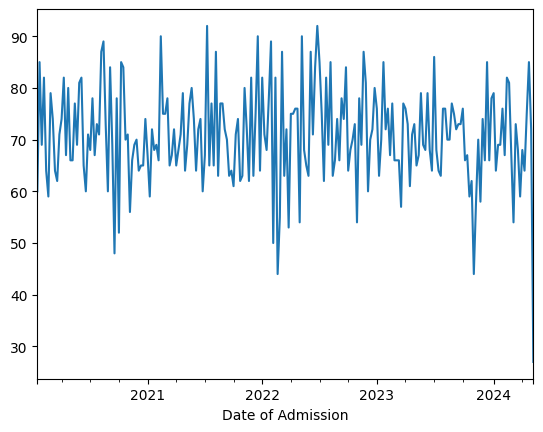

In [62]:
ts_add_elective['Admissions'].plot()

## Time Series Insurance Provider

In [ ]:
ts_ins_aetna = ts_insurance[['Aetna']].rename(columns={'Aetna': 'Admissions'})
ts_ins_bluecross = ts_insurance[['Blue Cross']].rename(columns={'Blue Cross': 'Admissions'})
ts_ins_cigna = ts_insurance[['Cigna']].rename(columns={'Cigna': 'Admissions'})
ts_ins_medicare = ts_insurance[['Medicare']].rename(columns={'Medicare': 'Admissions'})
ts_ins_unitedhealthcare = ts_insurance[['UnitedHealthcare']].rename(columns={'UnitedHealthcare': 'Admissions'})

In [44]:
joblib.dump(best_rf, "draft2_elective_rf.pkl")

['draft2_elective_rf.pkl']